In [1]:
import os, sys
from tqdm import trange, tqdm

import math
import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt
import plotly.graph_objects as go


source = "../source"
sys.path.append(source)

from data_analysis.visualization.publication import pub_show
from simulate import rep_sim

In [2]:
function = lambda h: h

In [187]:
data_path = "../DNN/data/"

properties = pd.read_csv(
    data_path + "amazing data/properties simple.txt", sep=" ", header=0
)
# properties = pd.read_csv(
#     data_path + "Rogers McClelland/Table B1.txt", sep=" ", header=0
# )

Y = properties.to_numpy().T
# Y = np.array([[0, 1], [3, 1], [4, 0], [8, 7]])

dys = [np.linalg.norm(y_2 - y_1) ** 2 for y_1 in Y for y_2 in Y]
dys = [dy for dy in dys if dy !=0]

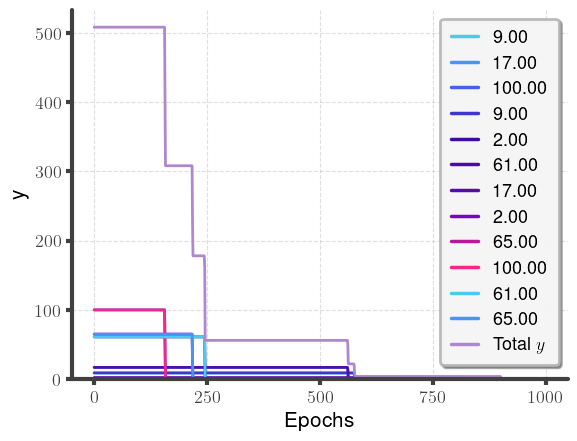

In [195]:
## Comparison


eta_h = 0.01
eta_y = eta_h * 1

fun = function


def der(t, z, dy):
    h, y, w = z
    return [
        -eta_h * w,
        -(eta_y * fun(h) * y + eta_h * w**2 / h),
        -0.5 * (eta_y * fun(h) * (w + y) + eta_h * (w / h) * (3 * w - y + dy)),
    ]


epochs = np.arange(1000)


D0 = 1e-50


t_max = 200000


def get_z(dy):
    x0 = 1
    h0 = D0 * x0
    y0 = np.max((dy, D0**2 * x0))
    w0 = 0
    sol = scipy.integrate.solve_ivp(
        der, [0, t_max], [h0, y0, w0], args=[dy], dense_output=True
    )
    t = np.linspace(0, t_max, len(epochs))
    z = sol.sol(t)
    return z


fig, ax = plt.subplots()

# dys = [3, 10, 30]
# dys = [20, 5, 1]
# dys = [16, 4, 2]

for dy in dys:
    y = get_z(dy)[1]
    plt.plot(epochs, y, label=f"{dy:.2f}")
    # plt.plot(epochs, y, label=f"$y (||y_2^*-y_1^*||^2={dy:.2})$")

y_total = np.zeros(len(epochs))
for dy in dys:
    y_total += get_z(dy)[1]
plt.plot(epochs, y_total, label=f"Total $y$", color="#AF87CE")

ax.legend(loc="upper right")
plt.xlabel("Epochs")
plt.ylabel("y")
plt.ylim(0)
# plt.show()
pub_show(colors="gradient")

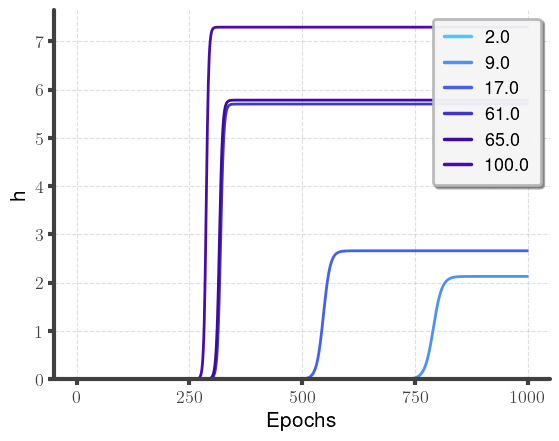

In [168]:
fig, ax = plt.subplots()


unique_dys = list(set(dys))
unique_dys.sort()
for dy in unique_dys:
    h = get_z(dy)[0]
    # plt.plot(epochs, h)
    plt.plot(epochs, h, label=f"{dy:.4}")

# y_total = np.zeros(len(epochs))
# for dy in dys:
#     y_total += get_z(dy)[1]
# plt.plot(epochs, y_total, label=f"Total $y$", color="#AF87CE")

ax.legend(loc="upper right")
plt.xlabel("Epochs")
plt.ylabel("h")
plt.ylim(0)
# plt.show()
pub_show(colors="gradient")